## **TIL**

* **문서간 유사도 비교**
* 분산 그래프를 통해 특정 단어와 같이 등장하는 단어간의 빈도와 거리 계산
* 시각화 방법이 제공하는 것은 빠른 의사결정

* **추천 시스템**
    * 실제 데이터를 사용해서 학습해야 함
    
    * **연관 분석**: 연관 분석 기술은 아이템 간의 상관 관계를 분석하여 추천을 제공, 이를 위해 데이터셋을 잘 구성하고 정제해야 함
    * 데이터의 item 수가 늘어나면(예: 단어 수) 계산 식이 복잡해지고 속도가 떨어진다
        * 이러한 경우 분산 처리 기술이나 최적화된 알고리즘을 사용하여 계산 속도를 향상시킬 수 있음

* 장바구니 분석의 예
* 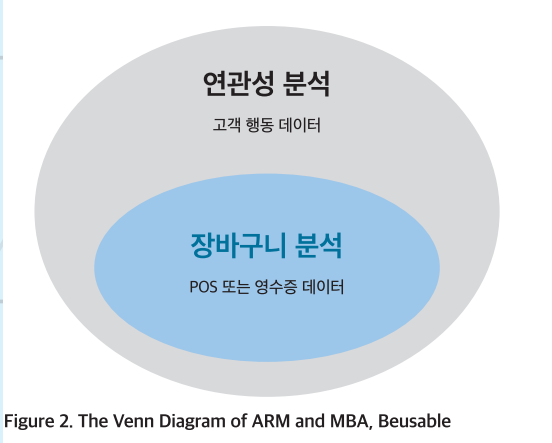<br>
 *출처: 추알못의 슬기로운 추천생활 #2*


* **지지도 (Support):**

    * 아이템 A와 아이템 B를 모두 포함하는 거래의 비율입니다.
    즉, 아이템 A와 B가 동시에 포함된 거래의 수를 전체 거래 수로 나눈 값입니다.
    * 지지도는 A와 B가 함께 발생하는 정도를 나타내므로, 연관 분석에서 빈번하게 사용되는 패턴을 찾는 데 도움이 됩니다.

    > $Support(A→B)= \frac{transactions\,containing\,both\,A\,and\,B}{total\,transactions}$
    A와 B를 포함하는 거래 수 / 전체 거래 수 

* **​신뢰도 (Confidence):**

    * 아이템 A를 포함하는 거래에서 아이템 B가 포함될 확률입니다.
        즉, 아이템 A가 포함된 거래 중에서 아이템 B도 포함된 거래의 비율을 나타냅니다.
    * 신뢰도는 A가 일어날 때 B가 일어날 확률을 나타내므로, 연관 규칙의 신뢰성을 측정하는 데 사용됩니다.
    > $Confidence(A→B)= \frac{transactions\,containing\,both\,A\,and\,B}{transactions\,containing\,A}$
    $지지도 / P(A)$
* **향상도 (Lift):**

    * 아이템 A의 발생 여부를 알 때 아이템 B의 발생 여부를 알게 되는 정도를 나타냅니다.
    <br>즉, 아이템 A와 B가 독립적일 때와 비교하여 함께 발생할 확률이 얼마나 증가했는지를 나타냅니다.
    > $Lift(A→B)= \frac{Confidence(A->B)}{Support(B)}$

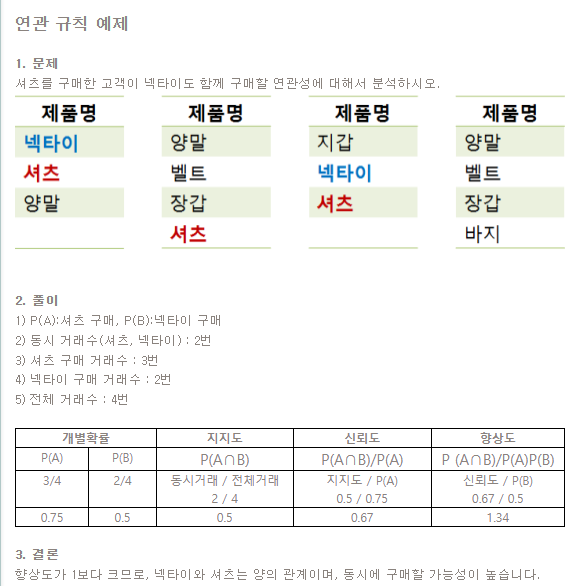<br>
    출처: <a>https://blog.naver.com/gkenq/10188110816</a>


---


* 수많은 행과 열을 가진 데이터의 유사도를 계산할 때
    * 두 데이터의 벡터간의 유사도를 내적: 코사인 유사도, 유클리디안 거리 사용
    
    * 특잇값 분해(Single Value Decomposition, SVD): 
        * 고차원의 데이터를 저차원으로 압축 > **데이터를 세 개의 행렬로 분해, 잠재적 특징 추출** 
    * 주성분 분석(Principal component analysis, PCA):
        * 분석하고자 하는 데이터의 분산을 최대한 보존하면서 서로 직교하는 세 축을 찾아, <br>고차원 공간의 표본들을 연관성이 없는 저차원의 공간으로 선형변환하는 차원축소 방법론 
    
        * 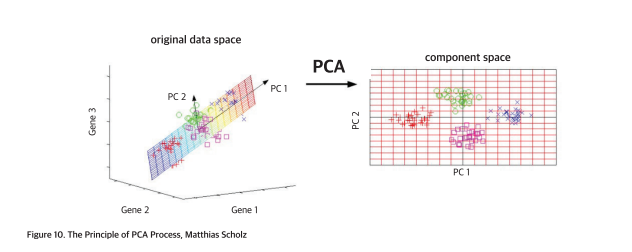 
        <br>
        *출처: 추알못의 슬기로운 추천생활 #2*

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# mlxtend :  일상적인 데이터 사이언스 작업에 유용한 도구들로 구성된 파이썬 라이브러리

**개별 확률을 통해 동시 출현 빈도수를 계산하는 신뢰도, 향상도 항목**

In [9]:
dataset = [['Milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'], 
['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]

#
te = TransactionEncoder() # f12로 내부 구조 살펴보기

In [10]:
te_ary = te.fit(dataset) # key 값을 sort하고 index 부여
te_ary = te_ary.transform(dataset) # dataset의 각 상품과 fit의 번호를 대조하기, 있으면 count
df = pd.DataFrame(te_ary, columns=te.columns_)                   
df

,Apple,Beans,Coke,Cookie,Corn,Eggs,Ice cream,Kidney Beans,Milk,Orange,Yogurt
0,True,True,False,True,False,True,False,False,True,False,True
1,True,True,True,True,False,True,False,False,False,False,True
2,True,False,False,False,False,True,False,True,True,False,False
3,False,True,False,False,True,False,False,False,True,True,True
4,False,True,False,True,True,True,True,False,False,False,False


**Boolean대수(공간안에 0과 1표현)**

In [24]:
te_ary

array([[ True,  True, False,  True, False,  True, False, False,  True,
        False,  True],
       [ True,  True,  True,  True, False,  True, False, False, False,
        False,  True],
       [ True, False, False, False, False,  True, False,  True,  True,
        False, False],
       [False,  True, False, False,  True, False, False, False,  True,
         True,  True],
       [False,  True, False,  True,  True,  True,  True, False, False,
        False, False]])

In [23]:
### 정수형으로 표현
te_ary.astype(int) 

array([[1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]])

****

In [21]:
def fit(X):
        """Learn unique column names from transaction DataFrame

        Parameters
        ------------
        X : list of lists
          A python list of lists, where the outer list stores the
          n transactions and the inner list stores the items in each
          transaction.

          For example,
          [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

        """
        unique_items = set()
        for transaction in X:
            for item in transaction:
                unique_items.add(item)
        columns_ = sorted(unique_items)
        columns_mapping = {}
        for col_idx, item in enumerate(columns_):
            columns_mapping[item] = col_idx
        columns_mapping_ = columns_mapping
        return columns_mapping_, columns_
fit(dataset)

{'Apple': 0,
 'Beans': 1,
 'Coke': 2,
 'Cookie': 3,
 'Corn': 4,
 'Eggs': 5,
 'Ice cream': 6,
 'Kidney Beans': 7,
 'Milk': 8,
 'Orange': 9,
 'Yogurt': 10}

In [22]:
from scipy.sparse import csr_matrix
import numpy as np

def transform( X, sparse=False):

        if sparse:
            indptr = [0]
            indices = []
            for transaction in X:
                # set is necessary because conversion to SparseDataFrame
                # will fail if there are duplicate items
                for item in set(transaction):
                    col_idx = fit(dataset)[0][item]
                    indices.append(col_idx)
                indptr.append(len(indices))
            non_sparse_values = [True] * len(indices)
            array = csr_matrix((non_sparse_values, indices, indptr), dtype=bool)
        else:
            array = np.zeros((len(X), len(fit(dataset)[1])), dtype=bool)
            for row_idx, transaction in enumerate(X):
                for item in transaction:
                    col_idx =fit(dataset)[0][item]
                    array[row_idx, col_idx] = True
        return array
transform(dataset)

array([[ True,  True, False,  True, False,  True, False, False,  True,
        False,  True],
       [ True,  True,  True,  True, False,  True, False, False, False,
        False,  True],
       [ True, False, False, False, False,  True, False,  True,  True,
        False, False],
       [False,  True, False, False,  True, False, False, False,  True,
         True,  True],
       [False,  True, False,  True,  True,  True,  True, False, False,
        False, False]])

In [26]:
te_ary = te.fit(dataset) # key 값을 sort하고 index 부여
te_ary = te_ary.transform(dataset) # dataset의 각 상품과 fit의 번호를 대조하기, 있으면 count
df = pd.DataFrame(te_ary.astype(int), columns=te.columns_)  

In [29]:
import numpy as np
df_intersections = np.array(df)
df_intersections, len(df_intersections), df_intersections.sum(axis = 0) / len(df_intersections) # 전체 행(항목)중에서 특정 항목 출현 빈도 계산

(array([[1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
        [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]]),
 5,
 array([0.6, 0.8, 0.2, 0.6, 0.4, 0.8, 0.2, 0.2, 0.6, 0.2, 0.6]))

In [31]:
### 지지도 직접 계산
pd.DataFrame({"items": te.columns_, "probability": df_intersections.sum(axis = 0) / len(df_intersections)})

,items,probability
0,Apple,0.6
1,Beans,0.8
2,Coke,0.2
3,Cookie,0.6
4,Corn,0.4
5,Eggs,0.8
6,Ice cream,0.2
7,Kidney Beans,0.2
8,Milk,0.6
9,Orange,0.2


**두개 이상 변수가 들어가면 동시출현빈도수**


In [37]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# 지지도를 기준으로 내림차순
frequent_itemsets
frequent_itemsets.sort_values('support',ascending=False)

c:\Users\bluecom001\miniconda3\envs\konlpy\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:113: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,support,itemsets
1,0.8,(Beans)
3,0.8,(Eggs)
0,0.6,(Apple)
2,0.6,(Cookie)
4,0.6,(Milk)
5,0.6,(Yogurt)
6,0.6,"(Eggs, Apple)"
7,0.6,"(Cookie, Beans)"
8,0.6,"(Eggs, Beans)"
9,0.6,"(Yogurt, Beans)"


In [38]:
rules1=association_rules(frequent_itemsets, metric='lift', min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Eggs),(Apple),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.00
1,(Apple),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.50
2,(Cookie),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.50
3,(Beans),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.00
4,(Eggs),(Beans),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8,-0.25
5,(Beans),(Eggs),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8,-0.25
6,(Yogurt),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.50
7,(Beans),(Yogurt),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.00
8,(Eggs),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.00
9,(Cookie),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.50


In [5]:
# 향상도가 1.2이상인 패턴을 발견
# 향상도: 1이하면 감소 요소
rules2 = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.2)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Eggs),(Apple),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.0
1,(Apple),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.5
2,(Cookie),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.5
3,(Beans),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.0
4,(Yogurt),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.5
5,(Beans),(Yogurt),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.0
6,(Eggs),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.0
7,(Cookie),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.5
8,"(Eggs, Cookie)",(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.5
9,"(Eggs, Beans)",(Cookie),0.6,0.6,0.6,1.00,1.666667,0.24,inf,1.0


In [6]:
#itemsets의 제품 개수에 따른 필터링을 위해 length열을 추가
#결과를 frequent_itemsets라는 이름으로 생성
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Apple),1
1,0.8,(Beans),1
2,0.6,(Cookie),1
3,0.8,(Eggs),1
4,0.6,(Milk),1
5,0.6,(Yogurt),1
6,0.6,"(Eggs, Apple)",2
7,0.6,"(Cookie, Beans)",2
8,0.6,"(Eggs, Beans)",2
9,0.6,"(Yogurt, Beans)",2


In [7]:
# frequent_itemsets에서 특정 조건을 만족시키는 행들을 선택
frequent_itemsets1 = frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.6)]
frequent_itemsets1

,support,itemsets,length
6,0.6,"(Eggs, Apple)",2
7,0.6,"(Cookie, Beans)",2
8,0.6,"(Eggs, Beans)",2
9,0.6,"(Yogurt, Beans)",2
10,0.6,"(Eggs, Cookie)",2


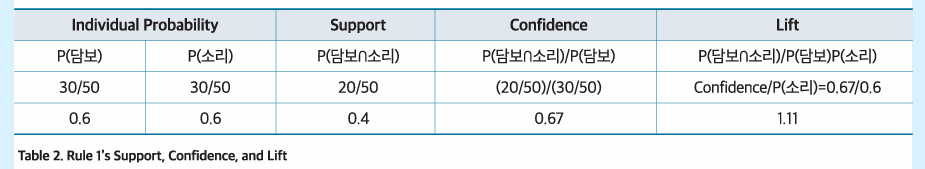<br>
* 향상도(LIFT)가 1이상이므로 양의 상관관계를 갖는다.
* '담보'를 시청하면 '소리'를 시청할 확률이 시청하지 않을 확률보다 더 크다고 할 수 있다. 

* mlxtend 치플레데이터
* 식당에서 주문한 자료를 이용하여 메뉴 추천